<img src="../../img/confusion_matrix.png" width="750" height="400">
<img src="../../img/confusion_matrix_1.png" width="750" height="400">

10000 yanlış var fakat accuracy çıkartıldığı zaman 990000'e göre küçük bir sayı olduğundan accuracy %99 çıkar bundan dolayı confusion matrix kontrol edilmeli.

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
data = pd.read_csv("../../data/data.csv")

In [9]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [10]:
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]

In [11]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

In [12]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(n_estimators = 100, random_state=1)

In [17]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [18]:
print("random forest algo result: ", rf.score(x_test,y_test))

random forest algo result:  0.9534883720930233


In [19]:
y_pred = rf.predict(x_test)
y_true = y_test

## Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
cm = confusion_matrix(y_true,y_pred)

In [22]:
cm

array([[53,  1],
       [ 3, 29]])

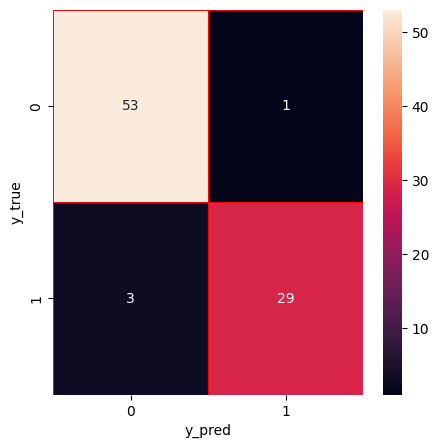

In [23]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()